In [2]:
# Import packages

import pandas as pd
import numpy as np

In [3]:
# helper functions

def correlation_matrix(df):
    """
    https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
    """
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix')
    labels=list(df.columns)
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()


def scatter_plot(df, names):
    """
    """
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    fig.set_size_inches(10,10)
    if len(names) is not 2:
        raise ValueError('Please provide "names" as a list of strings containing 2 names')
    plt.plot(df[names[0]], df[names[1]], 'o', color='blue')
    plt.show()


In [4]:
# Load data

df = pd.read_csv(r'C:\Users\Pietro\intro_to_machine_learning\data_sets\AirQualityUCI\AirQualityUCI.csv', sep=';')
# display content types
df.dtypes


Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [5]:
# display data (header & first rows)
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
# Process data

# Eliminate unwanted columns
df = df.drop(['Unnamed: 15'], axis=1)
df = df.drop(['Unnamed: 16'], axis=1)

df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


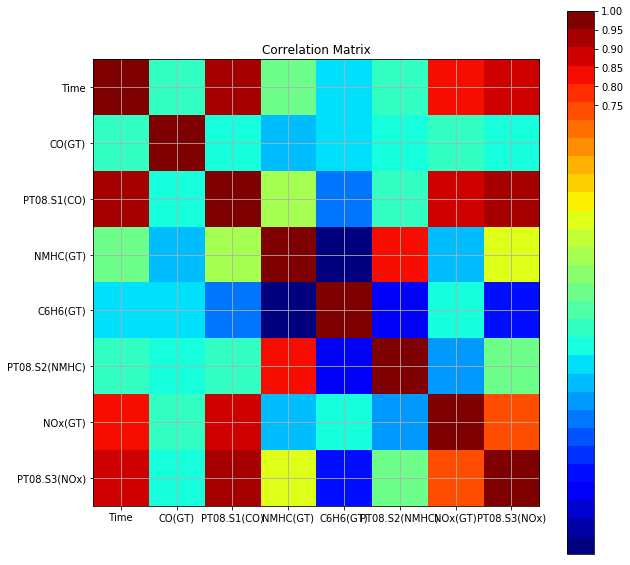

In [7]:
# let's first do some correlation analysis
correlation_matrix(df)

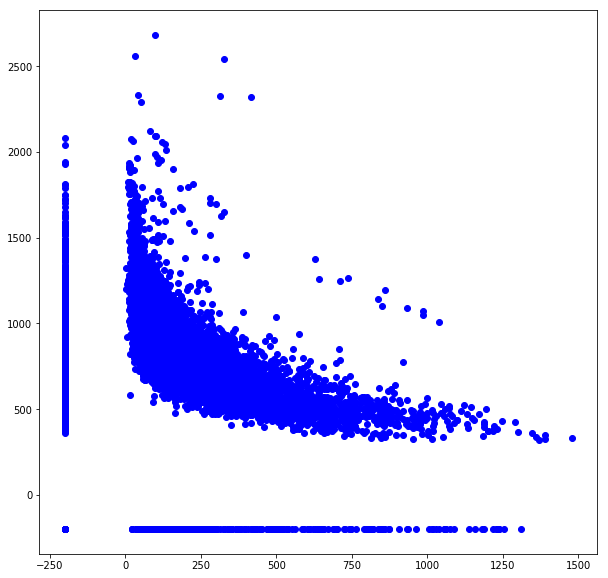

In [8]:
# train
# It looks like "NOx(GT)" and "PT08.S3(NOx)" correlate pretty well, so let's build a linear model for it
# First let's plot this data

scatter_plot(df, ['NOx(GT)','PT08.S3(NOx)'])

In [9]:
# Uhmm.. maybe let's prune some outliers

df_train = df[['NOx(GT)','PT08.S3(NOx)']]
df_train.head()
df_train.count()

NOx(GT)         9357
PT08.S3(NOx)    9357
dtype: int64

In [10]:
# test model
df_train_prune = df_train[df_train['NOx(GT)'] > 100]
df_train_prune = df_train_prune[df_train_prune['PT08.S3(NOx)'] > 0]

df_train_prune.count()

NOx(GT)         5462
PT08.S3(NOx)    5462
dtype: int64

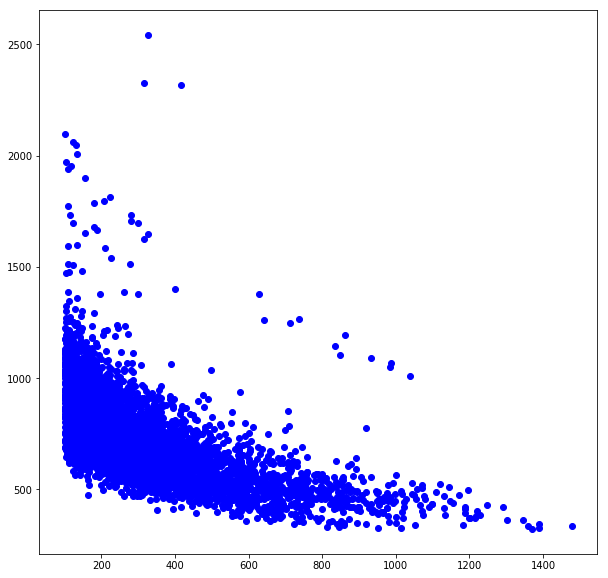

[[   1.  166.]
 [   1.  103.]
 [   1.  131.]
 ..., 
 [   1.  293.]
 [   1.  235.]
 [   1.  265.]]


In [11]:
# display data set after pruning
scatter_plot(df_train_prune, ['NOx(GT)','PT08.S3(NOx)'])

X = np.array(df_train_prune['NOx(GT)'])
X = np.array(np.concatenate([[np.ones(np.size(X))], [X]]))
X = np.transpose(X)

Y = np.array(df_train_prune['PT08.S3(NOx)'])
Y = np.transpose(Y)

In [12]:
# hypothesis

def linear_hypothesis(x, theta):
    '''
    Args:
        x: input data point
        theta: vector of coefficients
    
    Returns:
        h_x: linear composition of input and coefficient    
    '''
    h_x = 0
    for i in range(len(x)):
        h_x = h_x + theta[i]*x[i]
    return h_x

In [13]:
def least_squares_cost(X, Y, theta):
    '''
    Computes the cost of least squares on the dataset for a given set of coefficients
    
    Args:
        X: data point
        Y: data value
        theta: coefficients
        
    Returns:
        J: value of cost
    '''
    J = 0
    m = len(X[:,0])
    for i in range(m):
        h_x = linear_hypothesis(X[i][:],theta)
        J = J + np.square(h_x - Y[i])
    J = J * (1/(2*m))
    return J

In [14]:
def compute_der_cost(X, Y, theta, d):
    '''
    Compute the derivative of the cost at a given theta w.r.t. a given dimension d
    
    Args:
        X:
        Y:
        theta:
        d:
    
    Returns:
        der_cost:
    
    '''
    displacement = np.array(np.zeros(np.size(theta)))
    displacement[d] = 0.01
    
    f_x_r = least_squares_cost(X, Y, theta+displacement)
    f_x = least_squares_cost(X, Y, theta)
    
    der_cost = 0.5*(f_x_r - f_x)
    
    return der_cost

In [23]:
def gradient_descent(X, Y, theta_init, rate=0.0001, count_max=10):
    stop = 0
    count = 0
    m = len(theta_init)
    cost = []
    theta_temp = np.zeros(np.size(theta_init))
    
    while (stop == 0):
        print(count)
        if (count == 0):
            theta = theta_init
        
        for d in range(m):
            theta_temp[d] = theta[d] - rate*compute_der_cost(X, Y, theta, d)
        for d in range(m):
            theta[d] = theta_temp[d]
            
        cost.append(least_squares_cost(X, Y, theta))
        
        if (count > count_max-1):
            stop = 1            
        count = count + 1
    
    cost = np.array(cost)
    return theta, cost


theta = np.array([100, 100])
theta, cost = gradient_descent(X, Y, theta)
print(theta)

0
1
2
3
4
5
6
7
8
9
10
[89 43]
